# SpaceX Falcon 9 Visualisation EDA

## 1. Introduction

This notebook performs exploratory data analysis (EDA) and visualization for the Falcon 9 first-stage landing dataset. It builds on the datasets created in the Data Collection and Enrichment and Data Wrangling and Preparation notebooks.

We will explore:

* Launch trends over time (FlightNumber, Date, Year).

* Landing outcomes across LaunchSite, Orbit, and PayloadMass.

* Weather effects on landing success (TemperatureAvg, WindSpeed, and engineered categories).

* Feature preparation for machine learning (one-hot encoding for categorical variables).


## 2. Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load Dataset

Load the cleaned and enriched dataset from the previous notebooks.

In [2]:
df=pd.read_csv("dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,...,ReusedCount,Serial,Longitude,Latitude,TemperatureAvg,WindSpeed,Class,TempCategory,WindCategory,PayloadCategory
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,...,0,B0003,-80.577366,28.561857,25.7,9.7,0,Hot,Low,Medium
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,...,0,B0005,-80.577366,28.561857,24.7,13.5,0,Moderate,Moderate,Light
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,...,0,B0007,-80.577366,28.561857,14.8,15.3,0,Moderate,Moderate,Light
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,...,0,B1003,-120.610829,34.632093,15.1,10.8,0,Moderate,Moderate,Light
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,...,0,B1004,-80.577366,28.561857,18.1,5.7,0,Moderate,Low,Medium


In [3]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'TemperatureAvg', 'WindSpeed', 'Class', 'TempCategory', 'WindCategory',
       'PayloadCategory'],
      dtype='object')

## 4. Preliminary Exploration

Inspect distributions and missing values.

In [4]:
# Summary statistics
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,TemperatureAvg,WindSpeed,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6123.547647,1.788889,3.500000,3.188889,-86.366477,29.449963,21.559630,12.088742,0.666667
std,26.124701,4732.115291,1.213172,1.595288,4.194417,14.149518,2.141306,5.782112,4.233336,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,8.200000,3.600000,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,15.775000,9.200000,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,23.250000,11.850000,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,4.000000,-80.577366,28.608058,26.175000,14.350000,1.000000
max,90.000000,15600.000000,6.000000,5.000000,13.000000,-80.577366,34.632093,30.000000,25.200000,1.000000


In [5]:
# Missing values
missing = df.isnull().sum()
missing[missing > 0]

,0
LandingPad,26


##5. Launch Trends Analysis

### 5.1 Flight Number vs. Payload Mass

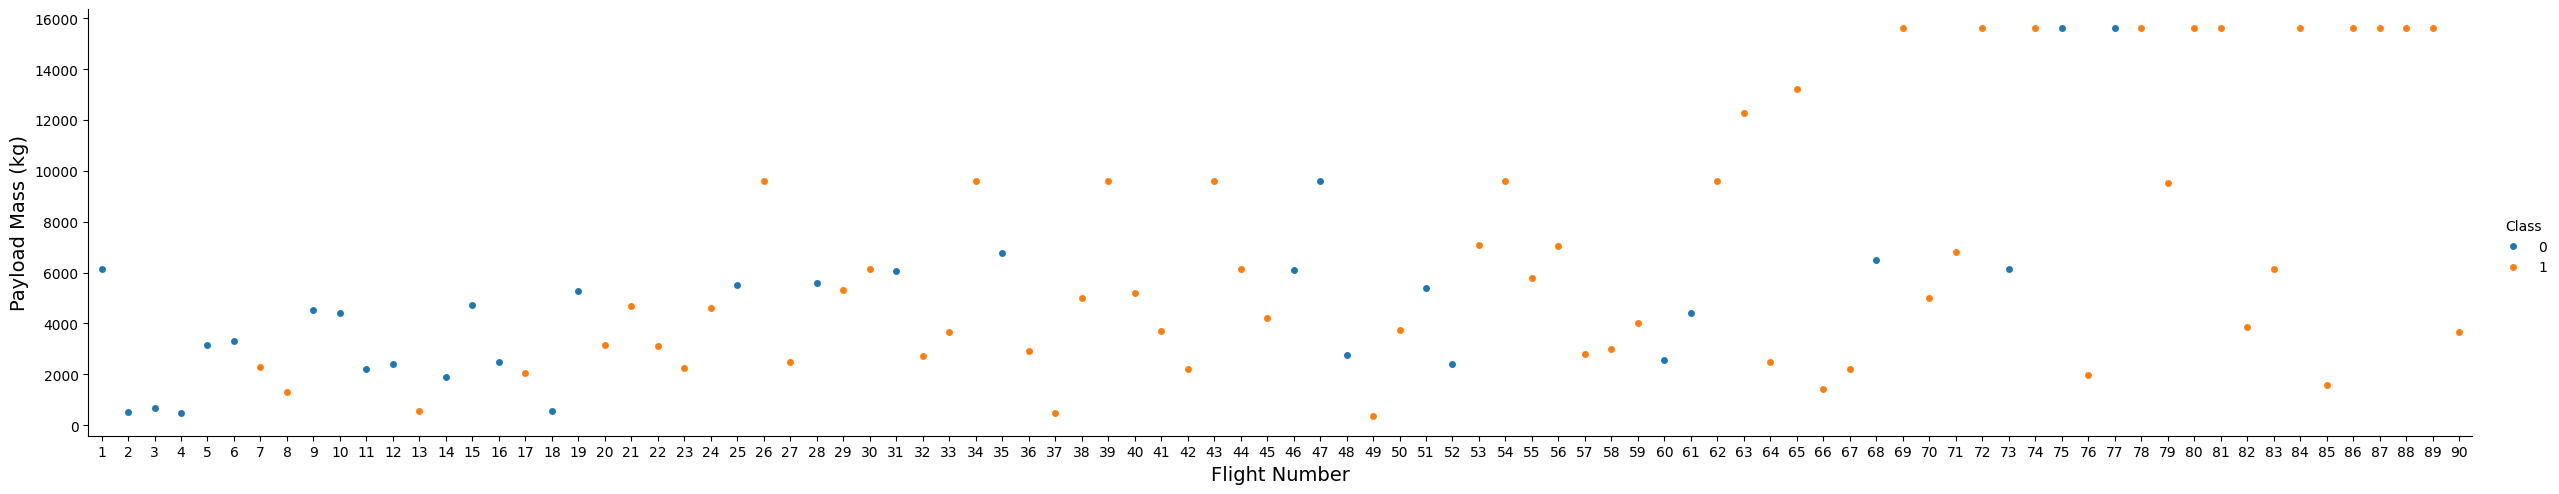

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.show()

Observation: Higher flight numbers tend to have higher landing success. Payload mass also shows an influence, but even some heavy payloads achieve successful landings.

### 5.2 Flight Number vs. Launch Site


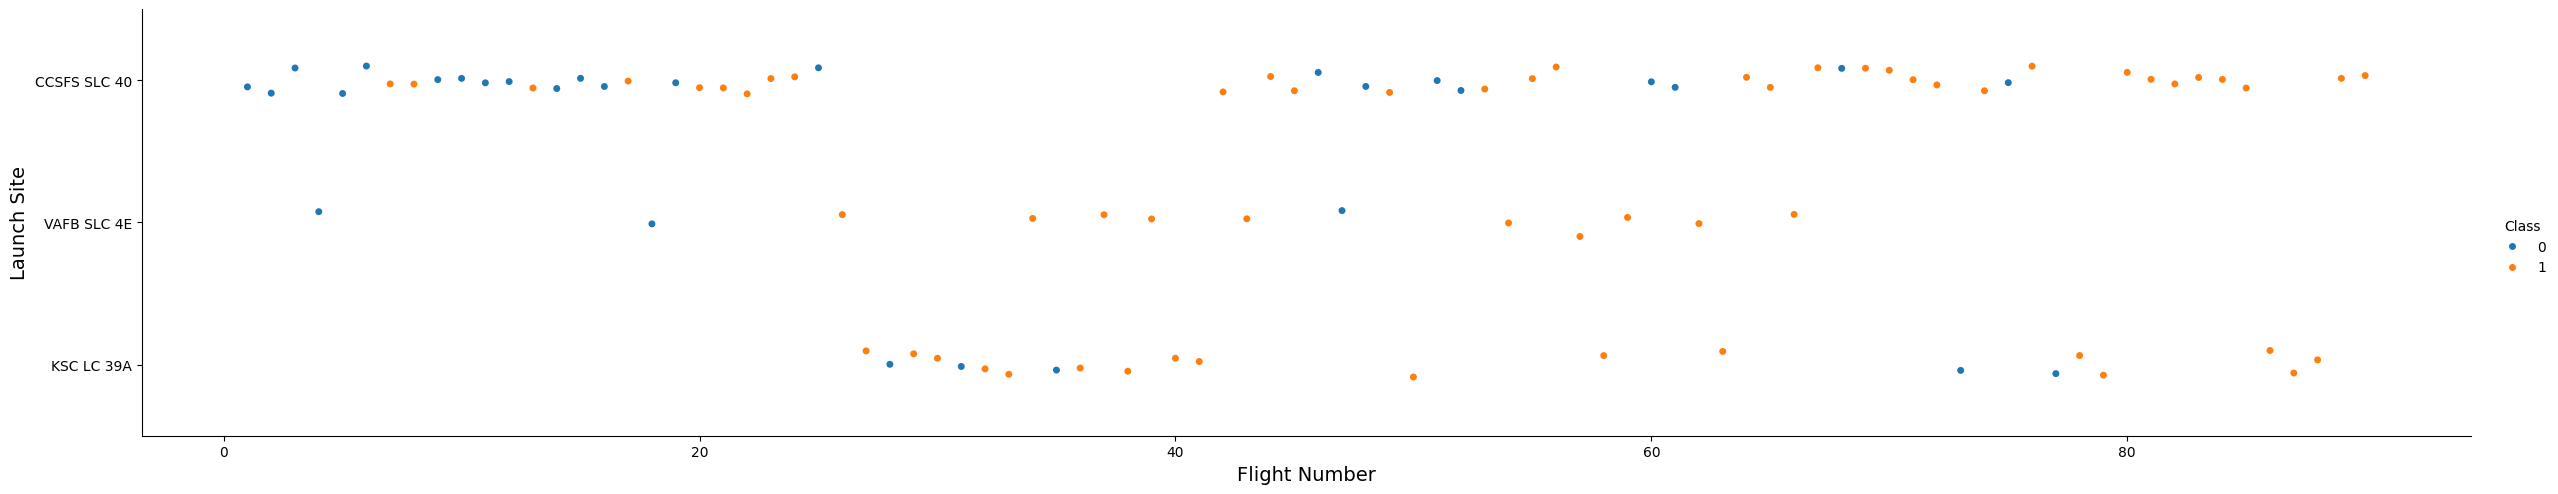

In [7]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.show()

Observation: All launch sites show increasing success with higher flight numbers, highlighting operational improvements over time.

## 6. Orbit and Payload Analysis

### 6.1 Payload Mass vs. Launch Site

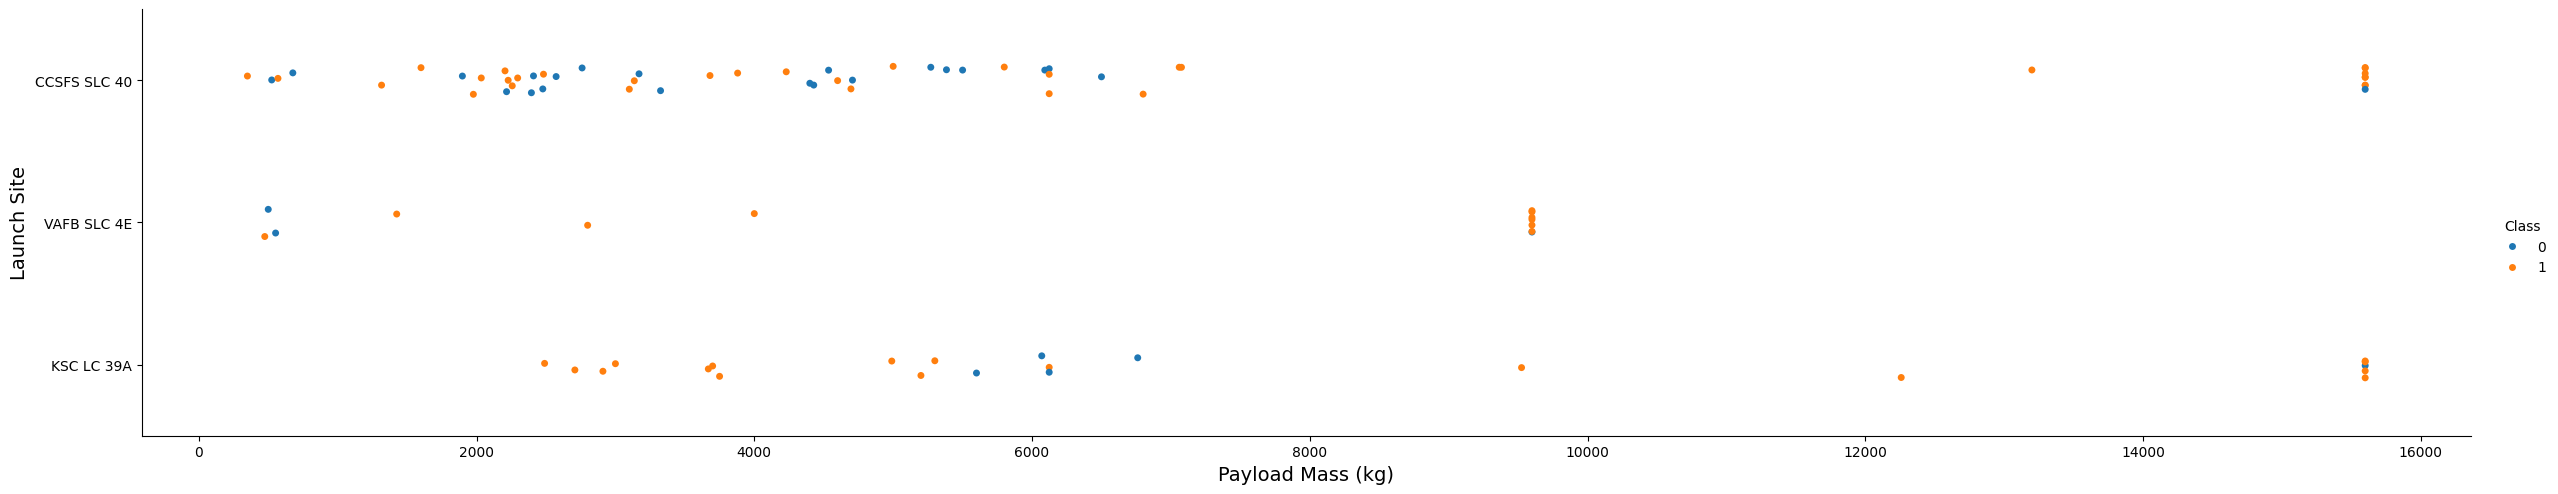

In [8]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.show()


Observation: For the VAFB-SLC launch site, there are no rockets launched with payload > 10,000 kg.


### 6.2 Landing Success by Orbit Type

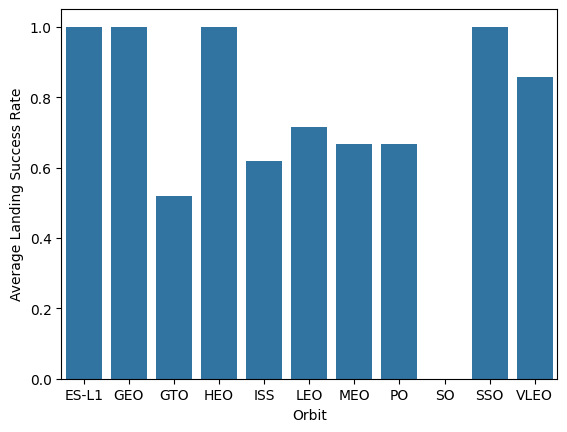

In [9]:
avg_df = df.groupby(['Orbit'])['Class'].mean().reset_index()
sns.barplot(data=avg_df, x='Orbit', y='Class')
plt.ylabel("Average Landing Success Rate")
plt.show()


Observation: Certain orbits (e.g., ES-L1, GEO, HEO, SSO) have consistently high success rates, likely due to simpler or specialized mission profiles.

### 6.3 Flight Number vs. Orbit

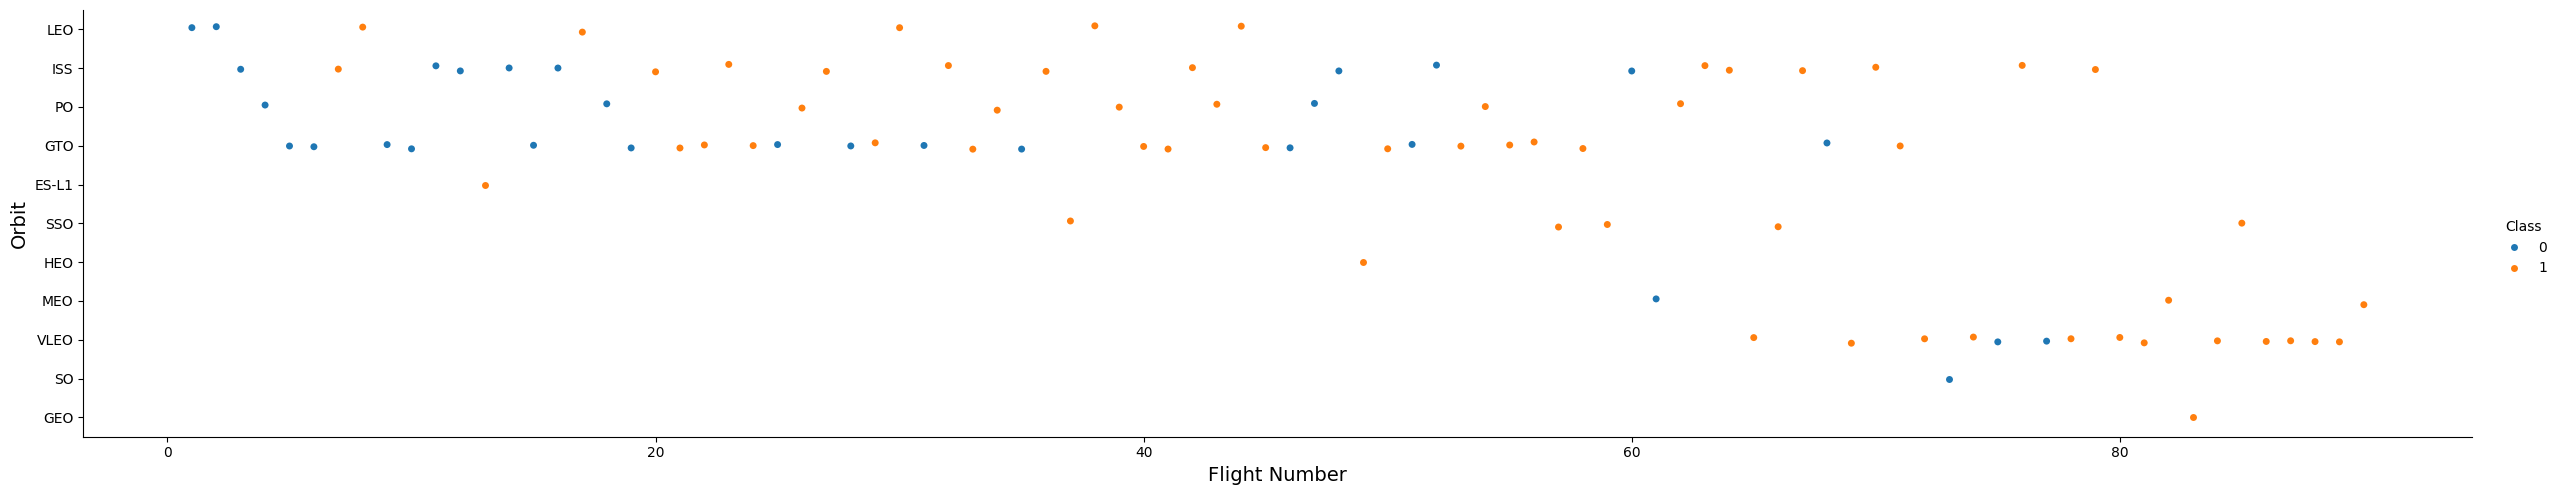

In [10]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit", fontsize=14)
plt.show()

Observation: LEO success is highly correlated with flight number. GTO shows no clear pattern with flight number.

## 7. Weather and Environmental Effects

### 7.1 Success Rate by Temperature Category

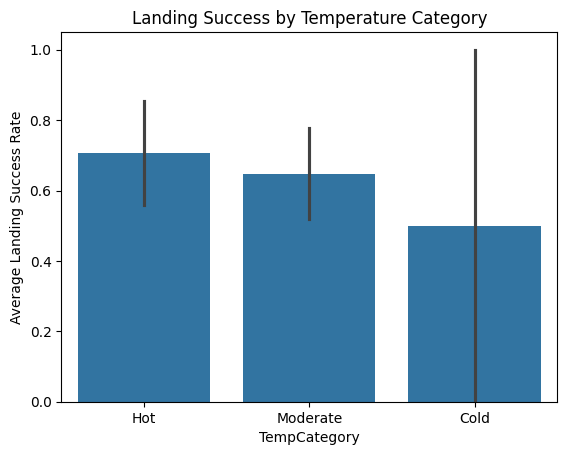

In [11]:
sns.barplot(data=df, x='TempCategory', y='Class')
plt.ylabel("Average Landing Success Rate")
plt.title("Landing Success by Temperature Category")
plt.show()

Observation: Hot and Moderate temperatures have higher success than Cold.

### 7.2 Success Rate by Wind Category

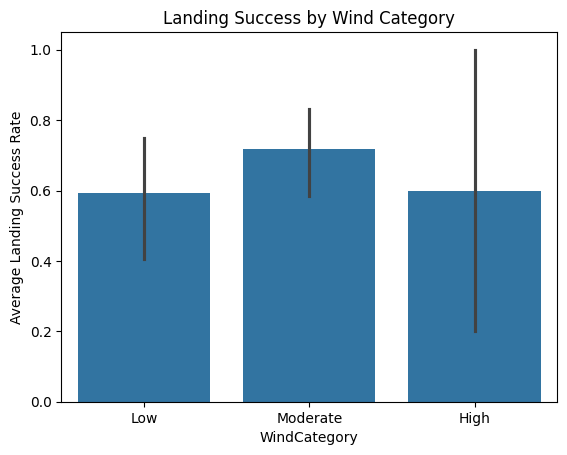

In [12]:
sns.barplot(data=df, x='WindCategory', y='Class')
plt.ylabel("Average Landing Success Rate")
plt.title("Landing Success by Wind Category")
plt.show()

Observation: Moderate wind launches show slightly higher success, but differences are small.

## 8. Multi-Feature Analysis

### 8.1 Payload and Orbit Interaction

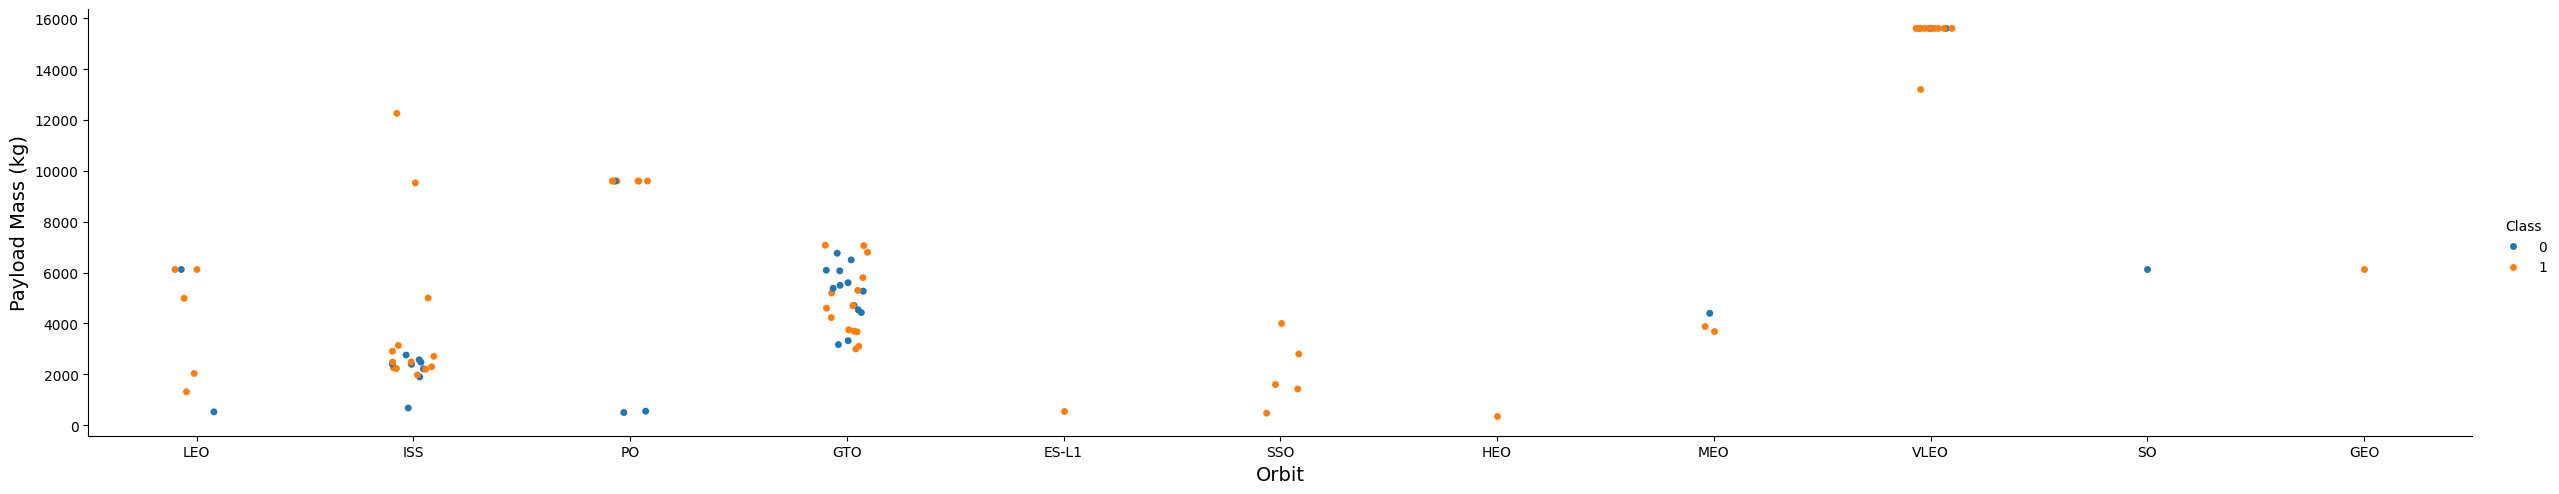

In [13]:
sns.catplot(y="PayloadMass", x="Orbit", hue="Class", data=df, aspect=5)
plt.xlabel("Orbit", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.show()

Observation: Heavy payloads show high success in Polar, LEO, and ISS orbits, but GTO is less predictable.

### 8.2 Weather Interaction with Payload

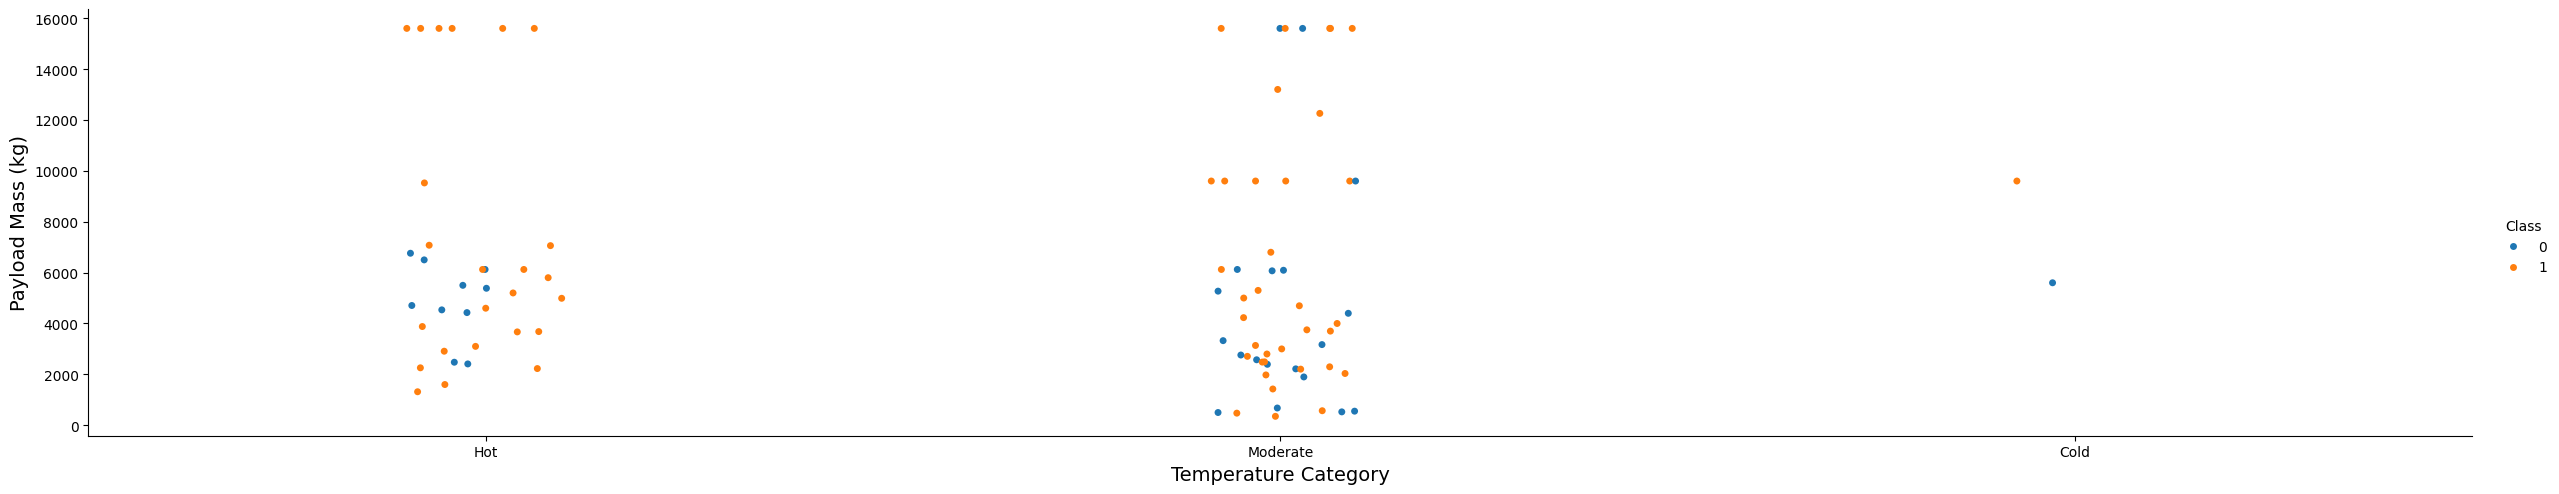

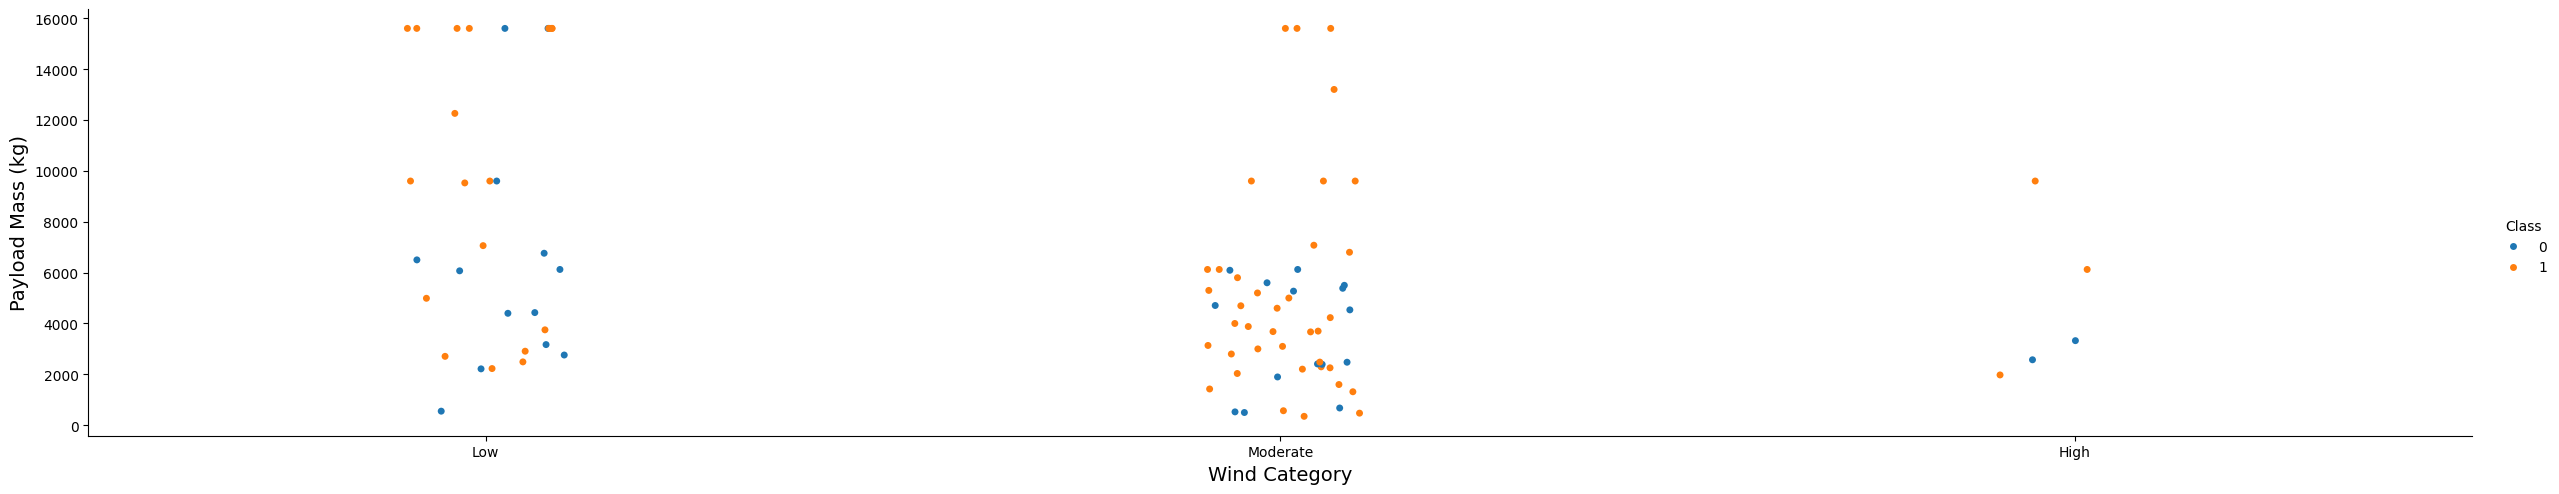

In [14]:
sns.catplot(y="PayloadMass", x="TempCategory", hue="Class", data=df, aspect=5)
plt.xlabel("Temperature Category", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.show()

sns.catplot(y="PayloadMass", x="WindCategory", hue="Class", data=df, aspect=5)
plt.xlabel("Wind Category", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.show()

Observation: Extreme temperatures or wind do not appear strongly associated with failures.

## 9. Launch success over time

<Axes: xlabel='Year', ylabel='Class'>

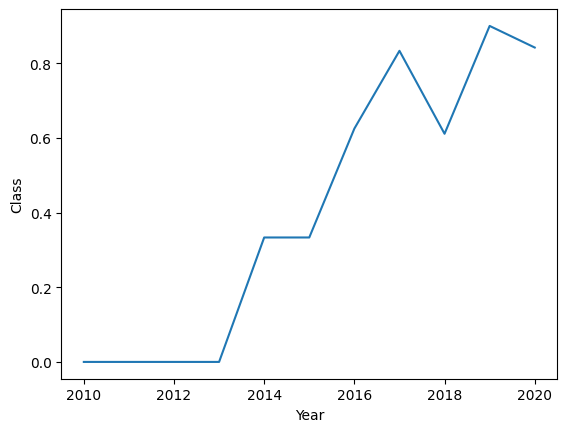

In [15]:
#Extract years from the date
df['Year'] = pd.to_datetime(df['Date']).dt.year
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df_year = df.groupby(['Year'])['Class'].mean().reset_index()
sns.lineplot(df_year, x = 'Year', y = 'Class')

Observation: Success rates increase over time, with decreases in 2018 and 2020.

## 10. Feature Preparation for Machine Learning



### 10.1 Select Features

Include operational, payload, weather, and reuse features observed in EDA.

In [16]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block',
               'ReusedCount', 'Serial', 'TempCategory', 'WindCategory']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,TempCategory,WindCategory
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,Hot,Low
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,Moderate,Moderate
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,Moderate,Moderate
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,Moderate,Moderate
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,Moderate,Low


### 10.2 One-Hot Encoding of Categorical Features

Encode categorical variables for ML models.

In [17]:
features_one_hot = pd.get_dummies(features,
                                  columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial',
                                           'TempCategory', 'WindCategory'])
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,TempCategory_Cold,TempCategory_Hot,TempCategory_Moderate,WindCategory_High,WindCategory_Low,WindCategory_Moderate
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### 10.3 Export Prepared Dataset

In [18]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

✅ Outcome: A numeric dataset including operational, payload, weather, and reuse features, ready for predictive modeling.

## ✅ 11. Conclusion

This analysis demonstrates how **visual exploratory data analysis** can uncover patterns in the Falcon 9 dataset. Key findings include:

- Landing success is more likely with higher flight numbers, showing improvement over time.  
- Orbit type is strongly associated with landing outcomes, while launch site plays a smaller role.  
- Weather conditions (temperature and wind) influence landing success, though effects are less pronounced than mission factors.  
- Visualizations of combined features (e.g., payload with orbit or site) reveal patterns that single-variable views might miss.  

✅ **Skills demonstrated:** data visualization with matplotlib and seaborn, exploratory analysis of categorical and continuous features, identifying multi-feature patterns, and preparing datasets for predictive modeling.  

This notebook builds on the **Data Wrangling** notebook and complements the **SQL EDA** analysis by providing graphical insights into the same dataset.  